In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
from tqdm import tqdm
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("/kaggle/input/spotify-data/spotify.csv")

In [4]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1    

In [8]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
df.shape

(113999, 21)

In [10]:
drop_col = ["Unnamed: 0","track_id","liveness"]
df.drop(drop_col,axis=1,inplace=True)

In [11]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.167,119.949,4,acoustic


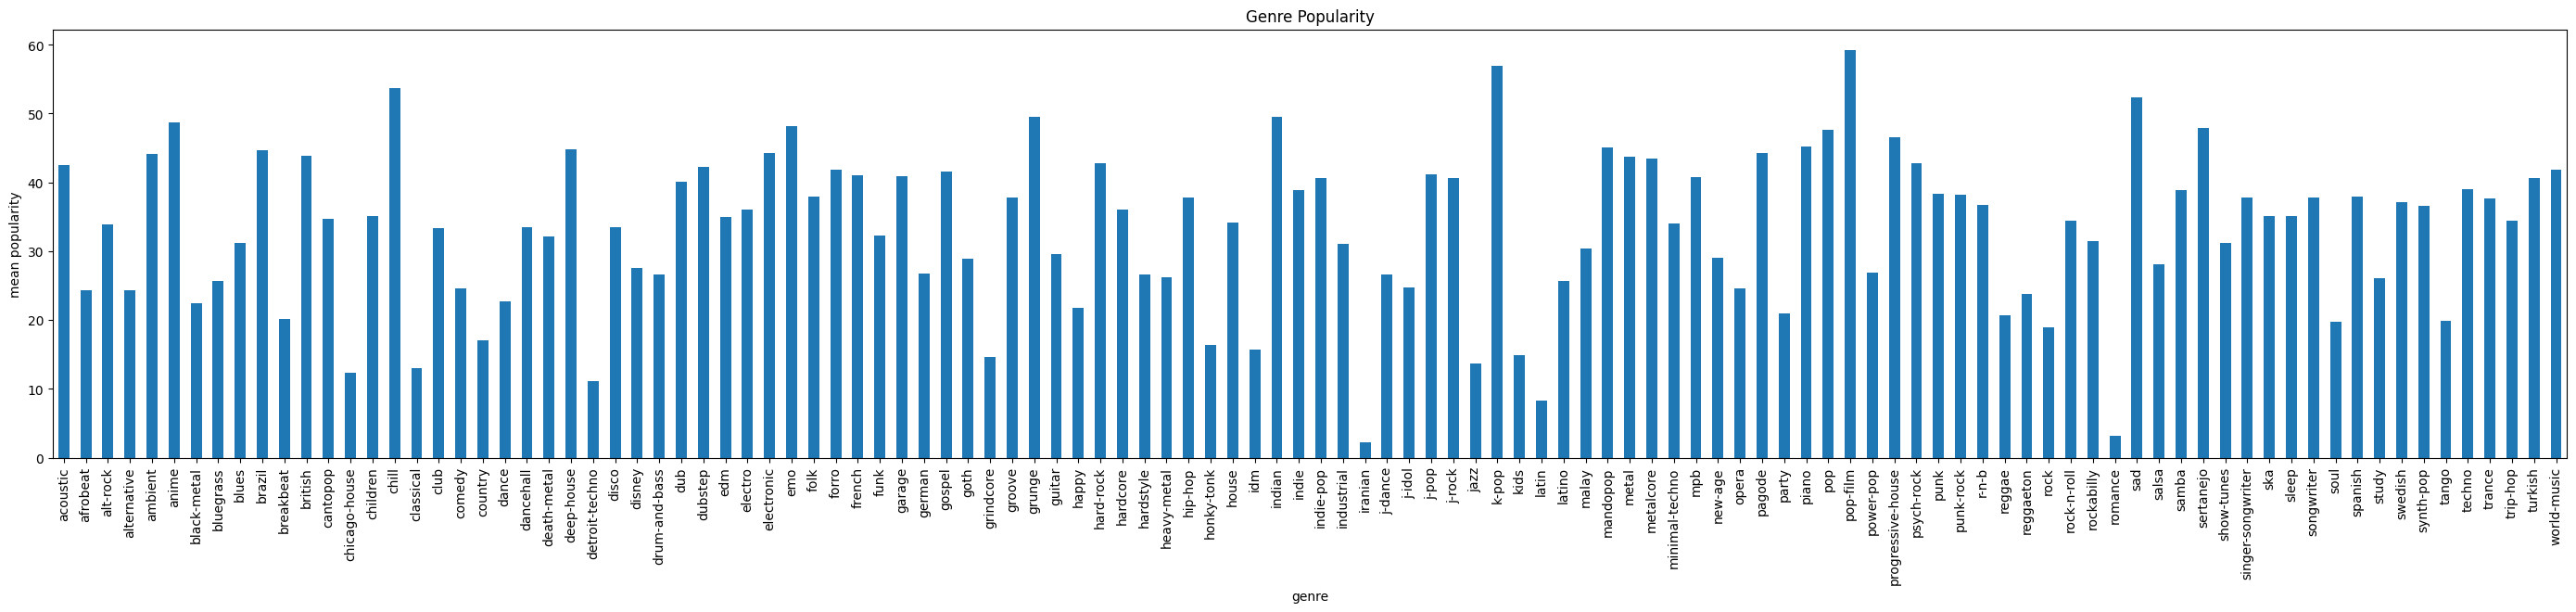

In [12]:
plt.figure(figsize=(35,6))
genre_popularity = df.groupby("track_genre")["popularity"].mean()
genre_popularity.plot(kind="bar")
plt.xlabel("genre")
plt.ylabel("mean popularity")
plt.title("Genre Popularity")
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


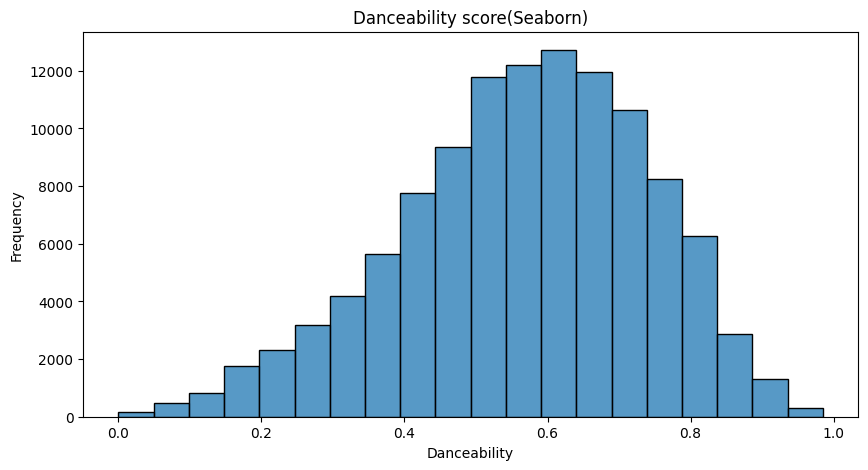

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df["danceability"],bins=20)
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Danceability score(Seaborn)")
plt.show()

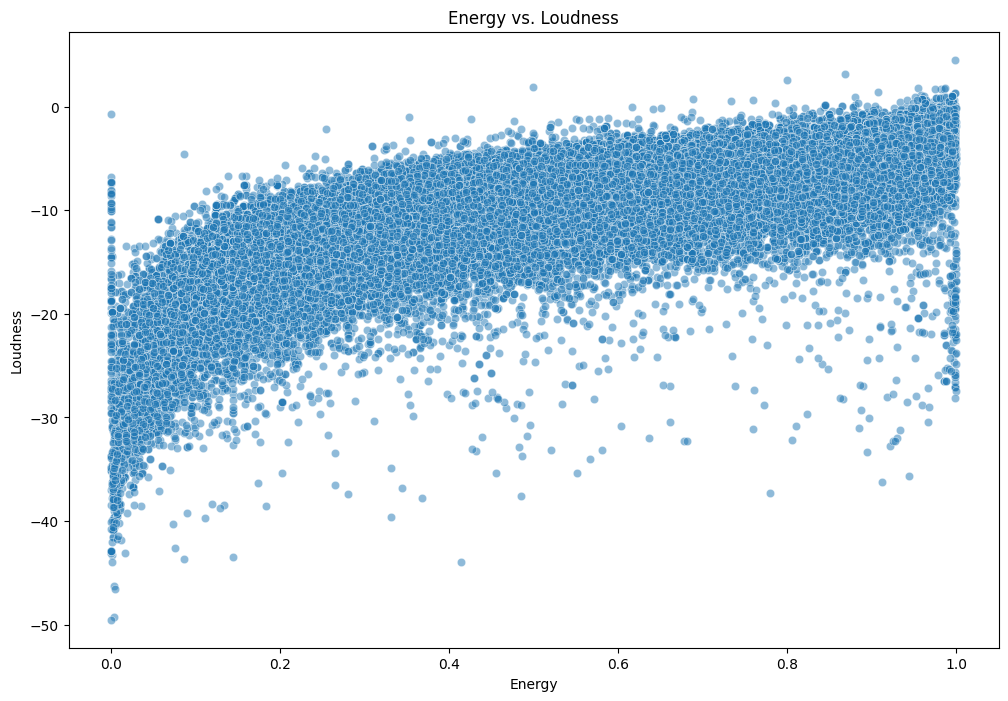

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='energy', y='loudness', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs. Loudness')
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Figure size 1400x600 with 0 Axes>

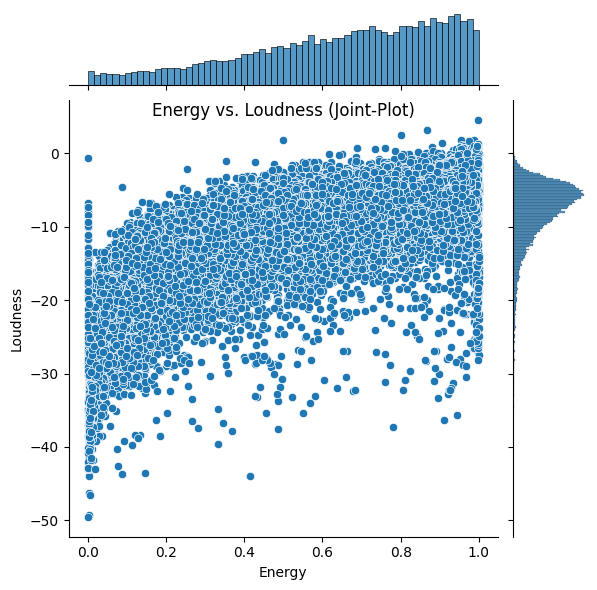

In [15]:
plt.figure(figsize=(14, 6))
sns.jointplot(x='energy', y='loudness', data=df, kind='scatter')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs. Loudness (Joint-Plot)', y=0.945)
plt.show()

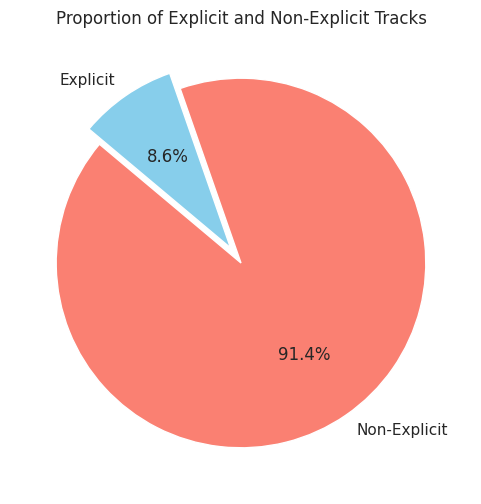

In [16]:
sns.set(style='whitegrid')
explicit_counts = df['explicit'].value_counts()
explode = (0, 0.1)  # Explode the second slice (explicit)
plt.figure(figsize=(6, 6))
plt.pie(explicit_counts, labels=['Non-Explicit', 'Explicit'], autopct='%1.1f%%', explode=explode, startangle=140, colors=['salmon', 'skyblue'])
plt.title('Proportion of Explicit and Non-Explicit Tracks')
plt.show()

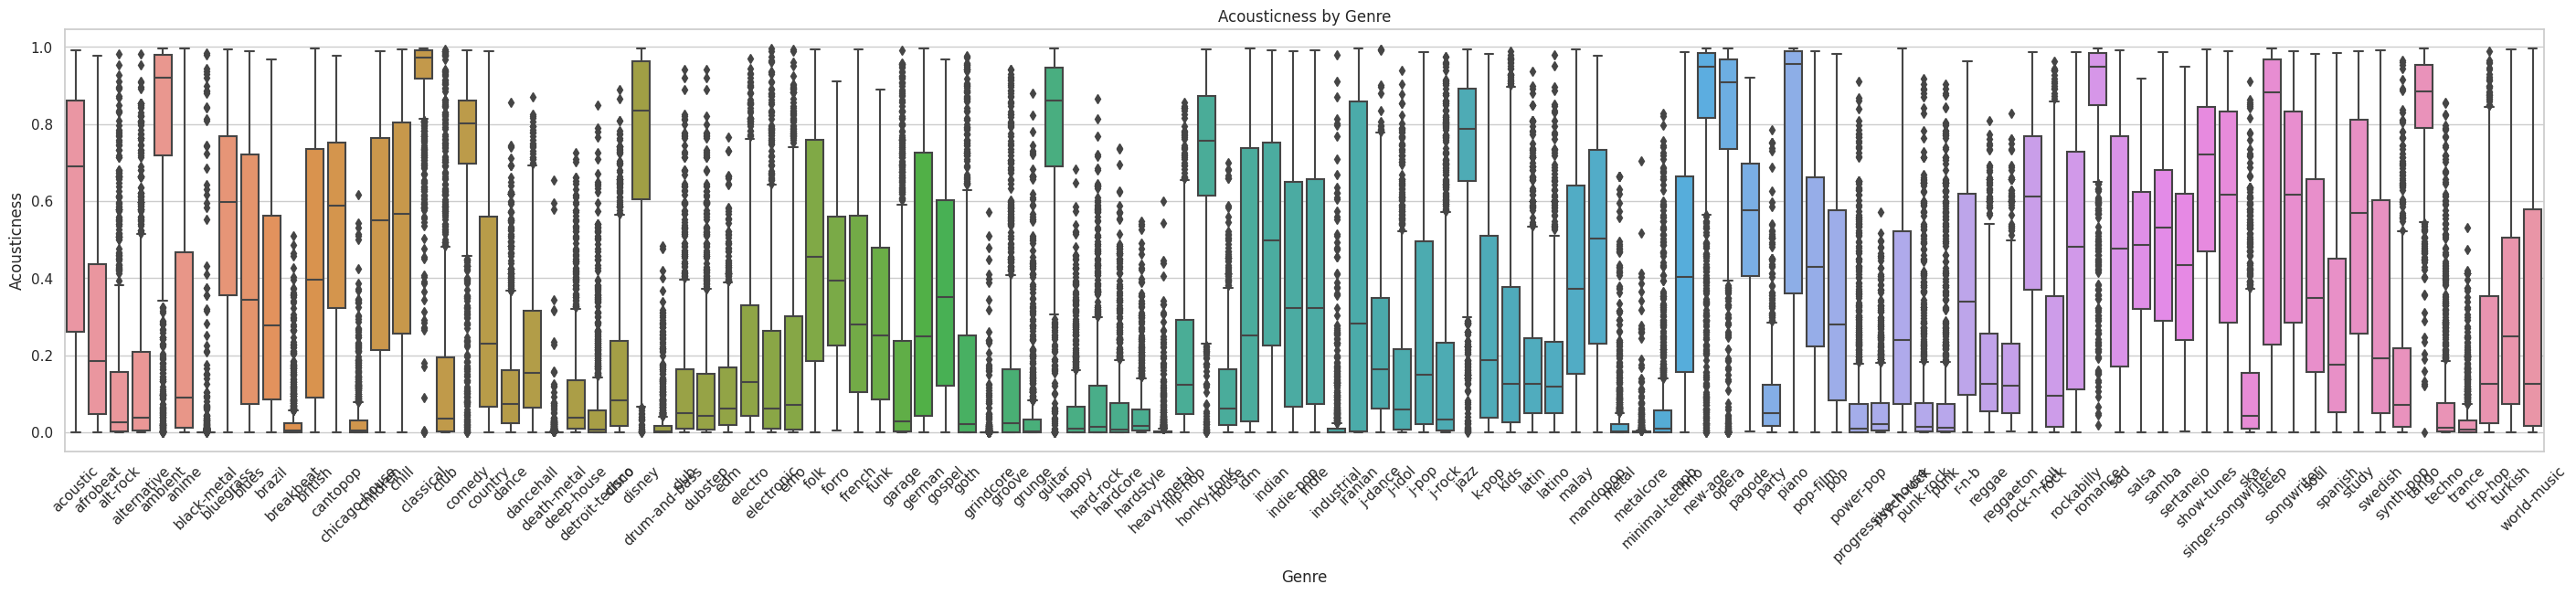

In [17]:
plt.figure(figsize=(35, 6))

sns.boxplot(x='track_genre', y='acousticness', data=df)
plt.xlabel('Genre')
plt.ylabel('Acousticness')
plt.title('Acousticness by Genre')
plt.xticks(rotation=45)
plt.show()

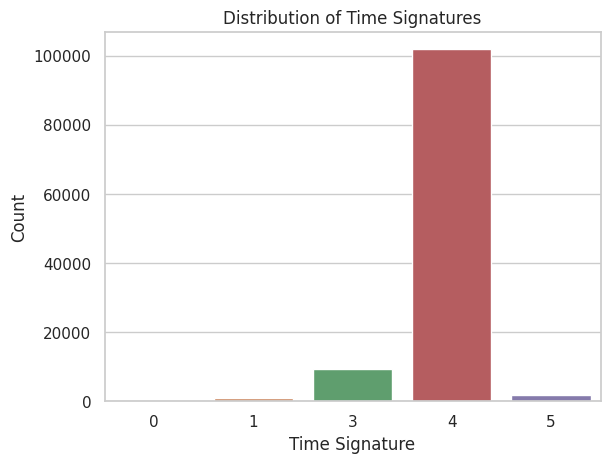

In [18]:
sns.countplot(x='time_signature', data=df)
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Distribution of Time Signatures')
plt.show()

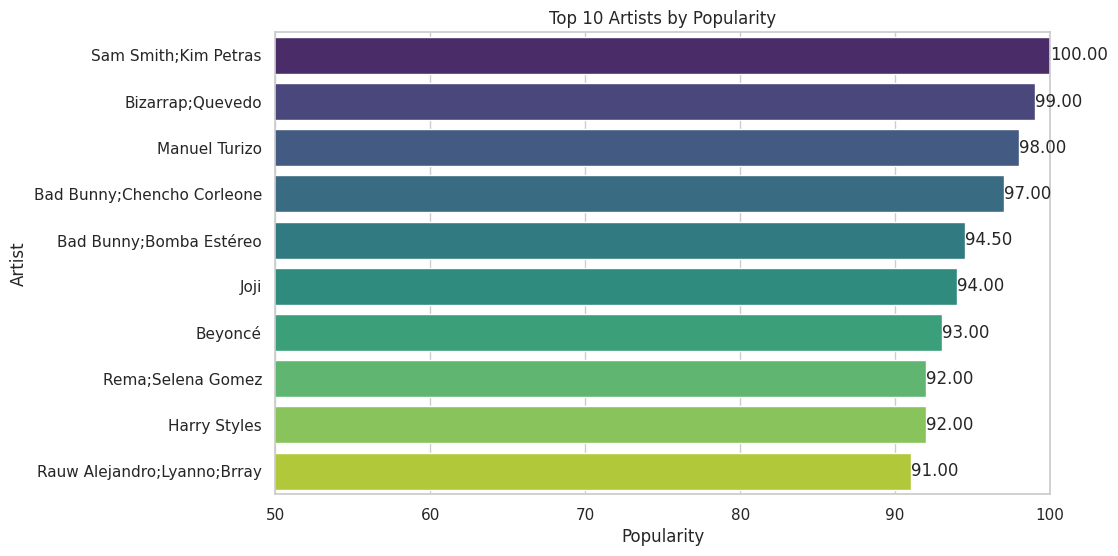

In [19]:
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette="viridis")

for index, value in enumerate(artist_popularity):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.xlim(50, 100)  # Setting x-axis limits from 50 to 100
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Popularity')
plt.show()

In [20]:
df = df.head(40000)

columns_to_drop = ['key', 'time_signature']
df = df.drop(columns=columns_to_drop)

df['explicit'] = df['explicit'].astype(int)

df['text_features'] = (
    df['artists'] + ' ' + df['album_name'] + ' ' + df['track_name'] + ' ' +
    df['track_genre'] + ' ' + df['danceability'].astype(str) + ' ' +
    df['energy'].astype(str) + ' ' + df['loudness'].astype(str) + ' ' +
    df['popularity'].astype(str) + ' ' + df['duration_ms'].astype(str) + ' ' +
    df['valence'].astype(str)
)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_features'])

tfidf_sparse = csr_matrix(tfidf_matrix)

cosine_sim_sparse = cosine_similarity(tfidf_sparse, tfidf_sparse)

def recommend(track_name, cosine_sim=cosine_sim_sparse, df=df):
    idx = df.index[df['track_name'] == track_name].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 recommendations
    track_indices = [i[0] for i in sim_scores]
    return df['track_name'].iloc[track_indices]

track_to_recommend = 'Hold On'
recommended_tracks = recommend(track_to_recommend)
print(f"Recommendations for '{track_to_recommend}':\n{recommended_tracks}")

Recommendations for 'Hold On':
954                  Hold On
325       Hold On - Acoustic
14           Hold On - Remix
21419    Hold You - Hold Yuh
15964                   Hold
Name: track_name, dtype: object


In [21]:
# True values for evaluation (ground truth)
true_values = ['Just Hold On', 'Hold on to Me', 'Hold On', 'Hold On - Acoustic', 'Hold On - Remix']

# Predictions from the recommend function
predicted_values = recommend('Hold On')

# Accuracy
accuracy = accuracy_score(true_values, predicted_values)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(true_values, predicted_values)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(true_values, predicted_values, average='macro')
recall = recall_score(true_values, predicted_values, average='macro')
f1 = f1_score(true_values, predicted_values, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.0
Confusion Matrix:
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [22]:
track_to_recommend = 'Hikare Inochi'
recommended_tracks = recommend(track_to_recommend)
print(f"Recommendations for '{track_to_recommend}':\n{recommended_tracks}")

Recommendations for 'Hikare Inochi':
311                 Hikare Inochi
650                     いきのこり●ぼくら
414          As It Was - Acoustic
33610                   not alone
101      Somebody Else - Acoustic
Name: track_name, dtype: object


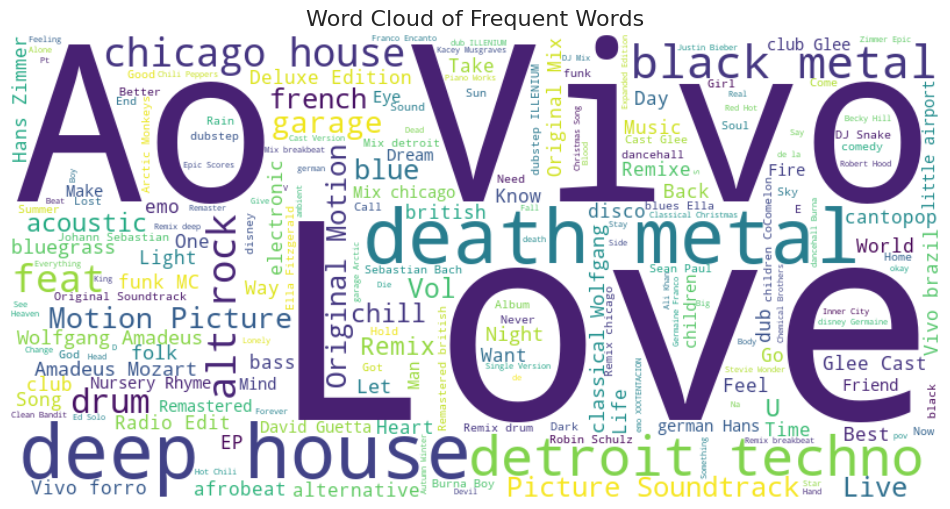

In [23]:
# most frequent words in these fields
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white',colormap='viridis', contour_color='black', contour_width=2, random_state=42).generate(' '.join(df['text_features']))

# Display the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words', fontsize=16)
plt.show()

In [24]:
# Keep only the first 10,000 instances
df_subset = df.head(10000)

# Select numerical columns for clustering
numerical_columns = df_subset.select_dtypes(include=['int', 'float']).columns
features_for_clustering = df_subset[numerical_columns]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_for_clustering)

# Set the number of clusters (you can adjust this based on your preference)
num_clusters = 10

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_subset['cluster'] = kmeans.fit_predict(normalized_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=3)  # Change to 2 for 2D visualization
reduced_features = pca.fit_transform(normalized_features)


# Function to get recommendations from a specific cluster
def get_cluster_recommendations(track_name, df_subset, amount=5):
    track_cluster = df_subset[df_subset['track_name'] == track_name]['cluster'].iloc[0]
    cluster_df = df_subset[df_subset['cluster'] == track_cluster]
    recommendations = cluster_df.sample(min(amount, len(cluster_df)))
    return recommendations[['artists', 'track_name']]

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


  0%|          | 0/10000 [00:00<?, ?it/s]

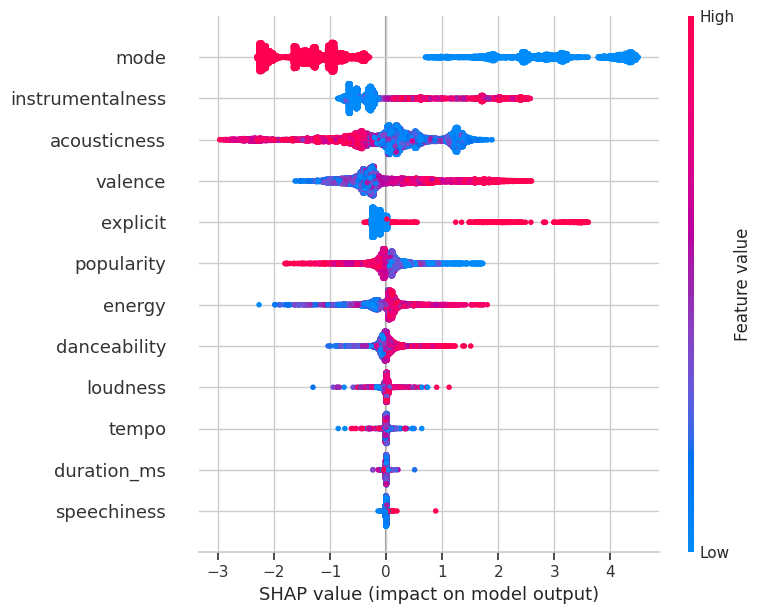

In [25]:
import shap

# Prepare the KMeans explainer
explainer = shap.KernelExplainer(kmeans.predict, shap.sample(normalized_features, 100))

# Explain the predictions (cluster assignments) for the entire dataset
shap_values = explainer.shap_values(normalized_features)

# Summary plot
shap.summary_plot(shap_values, normalized_features, feature_names=features_for_clustering.columns)

In [26]:
track_to_recommend = 'Hikare Inochi'
track_recommendations = get_cluster_recommendations(track_to_recommend, df_subset, amount=5)
display(track_recommendations)

,artists,track_name
6944,Portrayal of Guilt,A Burden
5280,ENHYPEN,Forget Me Not
2559,Soundgarden,Black Hole Sun
180,Caleb Santos;Viva Music Publishing Inc.,I Need You More Today
68,Andrew Belle,In My Veins - Feat. Erin Mccarley


In [27]:
class SpotifyRecommendation:
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, songs, amount=1):
        distance = []
        song_matches = self.dataset[(self.dataset.track_name.str.lower() == songs.lower())]

        if song_matches.empty:
            print(f"No matches found for the song '{songs}'")
            return None

        song = song_matches.head(1).values[0]
        rec = self.dataset[self.dataset.track_name.str.lower() != songs.lower()]

        for s in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if col not in [1, 6, 12, 14, 18]:
                    try:
                        d = d + np.absolute(float(song[col])) - float(s[col])
                    except ValueError:
                        # Handle non-numeric data (e.g., string in 'artists' column)
                        pass
            distance.append(d)

        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ["artists", "track_name"]
        return rec[columns][:amount]

In [28]:
# Create SpotifyRecommendation instance and recommend songs similar to "Hold On"
recommendations = SpotifyRecommendation(df)
similar_songs = recommendations.recommend("Hikare Inochi", 5)

# Display the recommendations in table format
display(similar_songs)

100%|██████████| 39998/39998 [00:01<00:00, 21420.36it/s]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,track_name
10935,Timo Maas,Crossing Wires 002 - Continuous DJ Mix
10984,Timo Maas,Crossing Wires 002 - Continuous DJ Mix
24348,Seth Troxler,The Lab 03 - Continuous DJ Mix Part 1
13344,Mark Farina,House of Om - Mark Farina - Continuous Mix
13245,Mark Farina,Live In Tokyo - Continuous Mix


In [29]:
# Define mood categories based on valence
def categorize_mood(valence):
    if valence > 0.7:
        return 'Positive'
    elif 0.4 <= valence <= 0.7:
        return 'Neutral'
    else:
        return 'Negative'

# Create a new column 'mood' based on valence
df['mood'] = df['valence'].apply(categorize_mood)

# Function to recommend tracks based on mood
def recommend_by_mood(user_mood, df, amount=5):
    mood_matches = df[df['mood'] == user_mood]

    if mood_matches.empty:
        print(f"No matches found for the mood '{user_mood}'")
        return None

    recommendations = mood_matches.sample(min(amount, len(mood_matches)))
    return recommendations[['artists', 'track_name', 'valence']]

In [30]:
# Get recommendations for positive mood

# Three moods - Positive , Neutral , Negative

user_mood = 'Negative'  # Replace with the user's current mood
mood_recommendations = recommend_by_mood(user_mood, df, amount=5)
display(mood_recommendations)

,artists,track_name,valence
29227,Bear Grillz;Stryer;Meg & Dia,Float,0.0587
2670,Machine Head,Davidian,0.3060
30366,SABAI;Hoang;Claire Ridgely,Million Days,0.0816
39741,CONNY,Wäscheständer,0.2200
325,Chord Overstreet,Hold On - Acoustic,0.2460


In [31]:
# Function to recommend tracks based on duration and energy
def recommend_by_duration_and_energy(preferred_duration, preferred_energy, df, amount=5):
    duration_matches = df[(df['duration_ms'] >= preferred_duration[0]) & (df['duration_ms'] <= preferred_duration[1])]
    energy_matches = duration_matches[(duration_matches['energy'] >= preferred_energy[0]) & (duration_matches['energy'] <= preferred_energy[1])]

    if energy_matches.empty:
        print(f"No matches found for the given duration and energy preferences")
        return None

    recommendations = energy_matches.sample(min(amount, len(energy_matches)))
    return recommendations[['artists', 'track_name', 'duration_ms', 'energy']]

In [32]:
preferred_duration = (150000, 300000)
preferred_energy = (0.8, 1)
result_table = recommend_by_duration_and_energy(preferred_duration, preferred_energy, df, amount=5)
display(result_table)

,artists,track_name,duration_ms,energy
22199,Gangrena Gasosa,Eu Não Entendi Matrix,183745,0.980
13189,Felix Da Housecat,Magic Fly,180280,0.888
10034,Noisia;Futurebound,Oh Oh - Futurebound Remix,226046,0.957
2572,Charlie Brown Jr.;Marcelo Nova,Hoje - Ao Vivo,262533,0.967
39549,Swiss & Die Andern,Besteste Band,214396,0.902
